In [78]:
# Importing the neccesary libraries and packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [79]:
# Reading the data 

engagement_data = pd.read_csv('../data/user_overview_data.csv')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [80]:
# Rename the columns for simplicity

engagement_data.rename(columns={'Bearer Id':'Session Frequency', 'Dur. (ms)':'Total Duration', 'Total_UL_and_DL':'Total traffic in MBs'}, inplace= True)

In [81]:
# Grouping and aggregating the data

engagement_data = engagement_data.groupby('MSISDN/Number')
engagement_data = engagement_data.agg({'Session Frequency':'count','Total Duration':'sum','Total traffic in MBs':'sum'})

In [82]:
# Creating a data set containing only the specified metrics

engagement_cols = ['Session Frequency', 'Total Duration', 'Total traffic in MBs']
engagement_agg = engagement_data[engagement_cols]

In [83]:
# Sorting to see the top 10 users based on session frequency metric

engagement_agg = engagement_agg.sort_values(by='Session Frequency', ascending=False)
engagement_agg.head(10)


,Session Frequency,Total Duration,Total traffic in MBs
MSISDN/Number,,,
33626320676.000,18,1785419.000,7971.167
33614892860.000,17,1678397.000,7602.058
33625779332.000,17,1599052.000,7708.276
33659725664.000,16,1905478.000,6932.267
33760536639.000,15,1651084.000,8514.774
33675877202.000,15,1745131.000,7891.111
33667163239.000,13,1209703.000,5618.394
33604515716.000,12,1193033.000,5081.583
33760413819.000,12,1248477.000,5902.169


In [84]:
# Sorting to see the top 10 users based on Total duration metric

engagement_agg = engagement_agg.sort_values(by='Total Duration', ascending=False)
engagement_agg.head(10)

,Session Frequency,Total Duration,Total traffic in MBs
MSISDN/Number,,,
33659725664.000,16,1905478.000,6932.267
33626320676.000,18,1785419.000,7971.167
33659359429.000,11,1747994.000,4658.437
33675877202.000,15,1745131.000,7891.111
33614892860.000,17,1678397.000,7602.058
33760536639.000,15,1651084.000,8514.774
33625779332.000,17,1599052.000,7708.276
33786323068.000,12,1427807.000,5622.232
33664712899.000,11,1334982.000,6472.786


In [85]:
# Sorting to see the top 10 users based on Total traffic in MBs

engagement_agg = engagement_agg.sort_values(by='Total traffic in MBs', ascending=False)
engagement_agg.head(10)

,Session Frequency,Total Duration,Total traffic in MBs
MSISDN/Number,,,
33760536639.000,15,1651084.000,8514.774
33626320676.000,18,1785419.000,7971.167
33675877202.000,15,1745131.000,7891.111
33625779332.000,17,1599052.000,7708.276
33614892860.000,17,1678397.000,7602.058
33659725664.000,16,1905478.000,6932.267
33666464084.000,11,1168703.000,6530.983
33664712899.000,11,1334982.000,6472.786
33698792269.000,11,1052303.000,6149.754


In [86]:
# Finiding out the metric features and normalizing them

features = ['Session Frequency','Total Duration','Total traffic in MBs']
features_array = engagement_agg.loc[:,features].values
features_array = StandardScaler().fit_transform(features_array)
features_array

array([[16.85918142, 15.12169104, 16.85321169],
       [20.57669774, 16.45580955, 15.68633385],
       [16.85918142, 16.05569814, 15.51448841],
       ...,
       [-0.48922805,  0.61443461, -1.35117693],
       [-0.48922805,  0.37483255, -1.35208661],
       [-0.48922805, -0.85007167, -1.35278816]])

In [87]:
# Making sure if the data is normalized well or not
# Normalized data has a mean of 0 and std of 1

np.mean(features_array), np.std(features_array), features_array.shape

(1.138957652660259e-17, 1.0, (106471, 3))

In [88]:
# Changing my array into dataframe

normalized_data = pd.DataFrame(features_array,columns=features)
normalized_data

,Session Frequency,Total Duration,Total traffic in MBs
0,16.859,15.122,16.853
1,20.577,16.456,15.686
2,16.859,16.056,15.514
3,19.338,14.605,15.122
4,19.338,15.393,14.894
...,...,...,...
106466,-0.489,-0.895,-1.343
106467,-0.489,-0.256,-1.343
106468,-0.489,0.614,-1.351
106469,-0.489,0.375,-1.352


In [89]:
# Fitting the data with kmeans of k=3

kmeans = KMeans(3)
kmeans.fit(features_array)
clusters = kmeans.fit_predict(features_array)
clusters

array([1, 1, 1, ..., 0, 0, 0])

In [90]:
# Adding a new column to the normalized_data

normalized_data['cluster_num'] = clusters
normalized_data

,Session Frequency,Total Duration,Total traffic in MBs,cluster_num
0,16.859,15.122,16.853,1
1,20.577,16.456,15.686,1
2,16.859,16.056,15.514,1
3,19.338,14.605,15.122,1
4,19.338,15.393,14.894,1
...,...,...,...,...
106466,-0.489,-0.895,-1.343,0
106467,-0.489,-0.256,-1.343,0
106468,-0.489,0.614,-1.351,0
106469,-0.489,0.375,-1.352,0


In [91]:
# Copying the data frame and adding a new column 

non_nomalized_data = engagement_agg[features]
non_nomalized_data['cluster'] = clusters
non_nomalized_data

,Session Frequency,Total Duration,Total traffic in MBs,cluster
MSISDN/Number,,,,
33760536639.000,15,1651084.000,8514.774,1
33626320676.000,18,1785419.000,7971.167,1
33675877202.000,15,1745131.000,7891.111,1
33625779332.000,17,1599052.000,7708.276,1
33614892860.000,17,1678397.000,7602.058,1
...,...,...,...,...
33675475328.000,1,38371.000,38.022,0
33782507973.000,1,102689.000,37.929,0
33666684512.000,1,190320.000,34.000,0


In [92]:
# Create a new cluster_max dataframe and put the max values of the metrics inside it

cluster_max_dataframe = pd.DataFrame()
xDR_max = non_nomalized_data.groupby([clusters])['Session Frequency'].agg('max')
Total_duration_max = non_nomalized_data.groupby([clusters])['Total Duration'].agg('max') 	
Total_traffic_max = non_nomalized_data.groupby([clusters])['Total traffic in MBs'].agg('max')	
cluster_max_dataframe['xDR Max']=xDR_max
cluster_max_dataframe['Duration Max']=Total_duration_max
cluster_max_dataframe['Traffic Max']=Total_traffic_max
cluster_max_dataframe

,xDR Max,Duration Max,Traffic Max
0,2,241989.000,934.648
1,18,1905478.000,8514.774
2,4,514316.000,2345.859


In [93]:
# Create a new cluster_min dataframe and put the min values of the metrics inside it

cluster_min_dataframe = pd.DataFrame()
xDR_min = non_nomalized_data.groupby([clusters])['Session Frequency'].agg('min')
Total_duration_min = non_nomalized_data.groupby([clusters])['Total Duration'].agg('min') 	
Total_traffic_min = non_nomalized_data.groupby([clusters])['Total traffic in MBs'].agg('min')	
cluster_min_dataframe['xDR Min']=xDR_min
cluster_min_dataframe['Duration Min']=Total_duration_min
cluster_min_dataframe['Traffic Min']=Total_traffic_min
cluster_min_dataframe

,xDR Min,Duration Min,Traffic Min
0,1,7142.000,33.249
1,3,66594.000,661.852
2,1,18235.000,166.910


In [94]:
# Create a new cluster_mean dataframe and put the mean values of the metrics inside it

cluster_mean_dataframe = pd.DataFrame()
xDR_mean = non_nomalized_data.groupby([clusters])['Session Frequency'].agg('mean')
Total_duration_mean = non_nomalized_data.groupby([clusters])['Total Duration'].agg('mean') 	
Total_traffic_mean = non_nomalized_data.groupby([clusters])['Total traffic in MBs'].agg('mean')	
cluster_mean_dataframe['xDR Mean']=xDR_mean
cluster_mean_dataframe['Duration Mean']=Total_duration_mean
cluster_mean_dataframe['Traffic Mean']=Total_traffic_mean
cluster_mean_dataframe

,xDR Mean,Duration Mean,Traffic Mean
0,1.028,93294.664,477.827
1,4.169,434431.969,2061.597
2,2.140,192010.419,1042.364


In [95]:
# Finding out the number of total values per cluster

cluster_count_dataframe = pd.DataFrame()
xDR_count = non_nomalized_data.groupby([clusters])['Session Frequency'].agg('count')
cluster_count_dataframe['counts']=xDR_count
cluster_count_dataframe

,counts
0,79532
1,4471
2,22468


<AxesSubplot:title={'center':'Maximum total traffic distribution per cluster'}, ylabel='Traffic Max'>

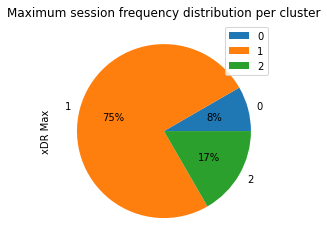

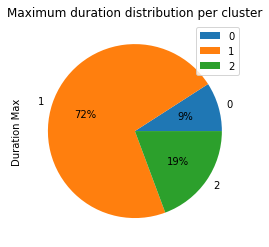

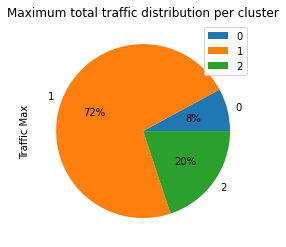

In [96]:
# Create a max_values pie chart per cluster

cluster_max_dataframe.plot(kind='pie',y='xDR Max',autopct='%1.0f%%',title='Maximum session frequency distribution per cluster')
cluster_max_dataframe.plot(kind='pie',y='Duration Max',autopct='%1.0f%%',title='Maximum duration distribution per cluster')
cluster_max_dataframe.plot(kind='pie',y='Traffic Max',autopct='%1.0f%%',title='Maximum total traffic distribution per cluster')

<AxesSubplot:title={'center':'Minimum total traffic distribution per cluster'}, ylabel='Traffic Min'>

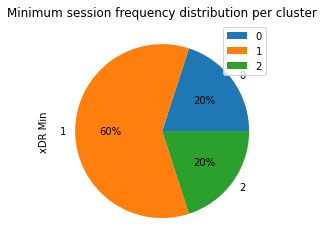

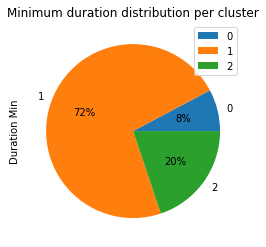

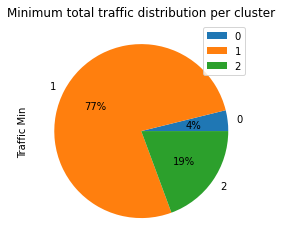

In [97]:
# Create a min_values pie chart per cluster

cluster_min_dataframe.plot(kind='pie',y='xDR Min',autopct='%1.0f%%',title='Minimum session frequency distribution per cluster')
cluster_min_dataframe.plot(kind='pie',y='Duration Min',autopct='%1.0f%%',title='Minimum duration distribution per cluster')
cluster_min_dataframe.plot(kind='pie',y='Traffic Min',autopct='%1.0f%%',title='Minimum total traffic distribution per cluster')

<AxesSubplot:title={'center':'Mean total traffic distribution per cluster'}, ylabel='Traffic Mean'>

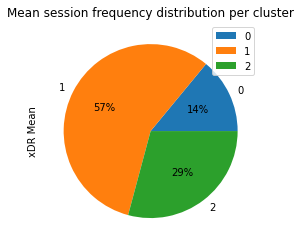

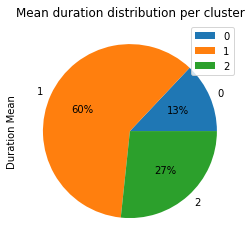

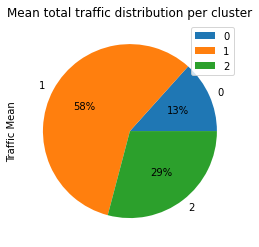

In [98]:
# Create a average values pie chart per cluster

cluster_mean_dataframe.plot(kind='pie',y='xDR Mean',autopct='%1.0f%%',title='Mean session frequency distribution per cluster')
cluster_mean_dataframe.plot(kind='pie',y='Duration Mean',autopct='%1.0f%%',title='Mean duration distribution per cluster')
cluster_mean_dataframe.plot(kind='pie',y='Traffic Mean',autopct='%1.0f%%',title='Mean total traffic distribution per cluster')

<AxesSubplot:title={'center':'Total values distribution per cluster'}, ylabel='counts'>

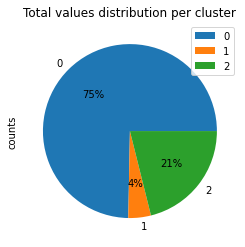

In [99]:
# Create a number of values pie chart per cluster

cluster_count_dataframe.plot(kind='pie',y='counts',autopct='%1.0f%%',title='Total values distribution per cluster')

In [100]:
# Reading the user_overview data and grouping it by id

data = pd.read_csv('../data/user_overview_data.csv')
user_engagement_data = data.groupby('MSISDN/Number').agg({'Gaming_UL_and_DL':'sum','Netflix_UL_and_DL':'sum','Youtube_UL_and_DL':'sum','Email_UL_and_DL':'sum','Google_UL_and_DL':'sum','Social Media_UL_and_DL':'sum'})
user_engagement_data.head()

,Gaming_UL_and_DL,Netflix_UL_and_DL,Youtube_UL_and_DL,Email_UL_and_DL,Google_UL_and_DL,Social Media_UL_and_DL
MSISDN/Number,,,,,,
33601001722.000,431.658,27.181,21.625,1.331,4.389,2.232
33601001754.000,119.750,11.222,12.432,3.308,5.335,2.661
33601002511.000,538.828,19.354,21.334,3.205,3.443,3.196
33601007832.000,391.126,1.942,6.977,2.285,9.678,0.280
33601008617.000,1314.798,49.202,41.533,3.305,18.500,2.913


In [101]:
# Sorting to see the top 10 users based on the gaming usage

user_engagement_data = user_engagement_data.sort_values(by='Gaming_UL_and_DL', ascending=False)
top_gaming_users = user_engagement_data.loc[:,['Gaming_UL_and_DL']]
top_gaming_users.head(10)

,Gaming_UL_and_DL
MSISDN/Number,
33760536639.000,7461.045
33675877202.000,6970.568
33625779332.000,6913.630
33614892860.000,6552.689
33626320676.000,6491.200
33659725664.000,5938.896
33658361927.000,5705.920
33664712899.000,5703.644
33666464084.000,5454.971


In [102]:
# Sorting to see the top 10 users based on the Netflix usage

user_engagement_data = user_engagement_data.sort_values(by='Netflix_UL_and_DL', ascending=False)
top_netflix_users = user_engagement_data.loc[:,['Netflix_UL_and_DL']]
top_netflix_users.head(10)

,Netflix_UL_and_DL
MSISDN/Number,
33659725664.000,383.449
33614892860.000,361.401
33625779332.000,319.423
33760536639.000,316.218
33667163239.000,313.939
33626320676.000,310.543
33675877202.000,309.093
33760413819.000,302.454
33761268199.000,273.106


In [103]:
# Sorting to see the top 10 users based on the Youtube usage

user_engagement_data = user_engagement_data.sort_values(by='Youtube_UL_and_DL', ascending=False)
top_youtube_users = user_engagement_data.loc[:,['Youtube_UL_and_DL']]
top_youtube_users.head(10)

,Youtube_UL_and_DL
MSISDN/Number,
33625779332.000,386.198
33614892860.000,378.744
33626320676.000,374.483
33760536639.000,357.450
33760413819.000,303.169
33675877202.000,300.766
33627080969.000,287.261
33603127838.000,284.090
33667163239.000,283.160


In [104]:
# Sorting to see the top 10 users based on the Email usage

user_engagement_data = user_engagement_data.sort_values(by='Email_UL_and_DL', ascending=False)
top_email_users = user_engagement_data.loc[:,['Email_UL_and_DL']]
top_email_users.head(10)

,Email_UL_and_DL
MSISDN/Number,
33625779332.000,40.634
33626320676.000,40.515
33614892860.000,37.111
33659725664.000,36.000
33786323068.000,32.399
33760536639.000,31.842
33675877202.000,31.514
33667163239.000,28.428
33698792269.000,27.374


In [105]:
# Sorting to see the top 10 users based on the Google usage

user_engagement_data = user_engagement_data.sort_values(by='Google_UL_and_DL', ascending=False)
top_google_users = user_engagement_data.loc[:,['Google_UL_and_DL']]
top_google_users.head(10)

,Google_UL_and_DL
MSISDN/Number,
33626320676.000,152.192
33625779332.000,142.308
33614892860.000,127.974
33760536639.000,117.434
33659725664.000,116.516
33675877202.000,109.861
33786323068.000,102.818
33667163239.000,97.541
33761268199.000,90.589


In [106]:
# Sorting to see the top 10 users based on the Social media usage

user_engagement_data = user_engagement_data.sort_values(by='Social Media_UL_and_DL', ascending=False)
top_social_media_users = user_engagement_data.loc[:,['Social Media_UL_and_DL']]
top_social_media_users.head(10)

,Social Media_UL_and_DL
MSISDN/Number,
33626320676.000,41.711
33760536639.000,38.126
33659725664.000,32.105
33614892860.000,28.295
33667163239.000,24.248
33669068942.000,23.801
33625779332.000,23.733
33665530316.000,22.586
33603127838.000,21.410


<AxesSubplot:title={'center':'Top 3 application a user has engaged with'}>

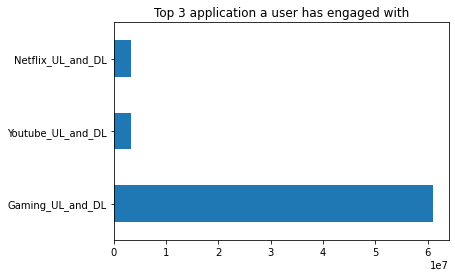

In [107]:
# Finding out the top 3 applications used by the users

top_applications = user_engagement_data[['Social Media_UL_and_DL','Google_UL_and_DL','Email_UL_and_DL','Youtube_UL_and_DL','Netflix_UL_and_DL','Gaming_UL_and_DL']].sum()
top_applications.sort_values(ascending = False).head(3).plot(kind='barh',title='Top 3 application a user has engaged with')

In [108]:
# Adding a user_engagement csv file

user_engagement_data.to_csv('../data/user_engegement_data.csv',index=False)

In [109]:
# Creating a WSS(With-Cluster Squared Sum) array to see the best K and itterating from k=1 to k=12

WSS = []
for i in range(1,13):
  km = KMeans(n_clusters=i,init='k-means++')
  km.fit(features_array)
  WSS.append(km.inertia_)

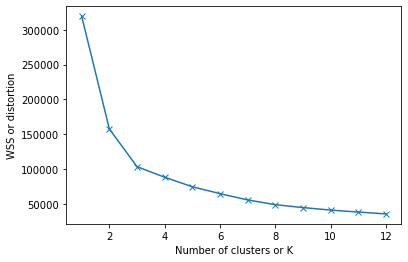

In [110]:
# Plotting the WSS graph to see the best K value
# The best K value will be determined by the elbow method the one that is located at the elbow point will be the best k for our K mean analysis

plt.plot(range(1,13),WSS, marker='x')
plt.xlabel('Number of clusters or K')
plt.ylabel('WSS or distortion') 
plt.show()

In [111]:
# By using elbow method we figured out that 4 is the best K value
# Lets cluster by using K = 4

kmeans = KMeans(4)
kmeans.fit(features_array)
new_clusters = kmeans.fit_predict(features_array)
new_clusters

array([2, 2, 2, ..., 0, 0, 0])

In [112]:
# Create a new data frame by using the new cluster

new_normalized_data = pd.DataFrame(features_array,columns=features)
new_normalized_data['clusters_new'] = new_clusters
new_normalized_data

,Session Frequency,Total Duration,Total traffic in MBs,clusters_new
0,16.859,15.122,16.853,2
1,20.577,16.456,15.686,2
2,16.859,16.056,15.514,2
3,19.338,14.605,15.122,2
4,19.338,15.393,14.894,2
...,...,...,...,...
106466,-0.489,-0.895,-1.343,0
106467,-0.489,-0.256,-1.343,0
106468,-0.489,0.614,-1.351,0
106469,-0.489,0.375,-1.352,0


In [113]:
# Creating a new non_normalized data frame by adding our new cluster

new_non_normalized_data = engagement_agg[features]
new_non_normalized_data['clusters_new'] = new_clusters
new_non_normalized_data.head(5)

,Session Frequency,Total Duration,Total traffic in MBs,clusters_new
MSISDN/Number,,,,
33760536639.000,15,1651084.000,8514.774,2
33626320676.000,18,1785419.000,7971.167,2
33675877202.000,15,1745131.000,7891.111,2
33625779332.000,17,1599052.000,7708.276,2
33614892860.000,17,1678397.000,7602.058,2


In [114]:
# Finding out the mean values per cluster

new_cluster_dataframe = pd.DataFrame()
xDR_mean = new_non_normalized_data.groupby('clusters_new')['Session Frequency'].agg('mean')
Total_duration_mean = new_non_normalized_data.groupby('clusters_new')['Total Duration'].agg('mean') 	
Total_traffic_mean = new_non_normalized_data.groupby('clusters_new')['Total traffic in MBs'].agg('mean')	
new_cluster_dataframe['xDR Mean']=xDR_mean
new_cluster_dataframe['Duration Mean']=Total_duration_mean
new_cluster_dataframe['Traffic Mean']=Total_traffic_mean

new_count = new_non_normalized_data.groupby('clusters_new')['Session Frequency'].agg('count')
new_cluster_dataframe['counts']=new_count
new_cluster_dataframe

,xDR Mean,Duration Mean,Traffic Mean,counts
clusters_new,,,,
0,1.016,92895.562,475.017,78277
1,2.018,174359.669,970.047,20830
2,5.292,550084.939,2615.501,1510
3,3.236,331776.670,1588.884,5854


In [115]:
# Finding and creating data traffic column
# Data traffic total = Traffic mean * counts

new_cluster_dataframe['Data Traffic Total'] = new_cluster_dataframe['Traffic Mean']*new_cluster_dataframe['counts']
new_cluster_dataframe

,xDR Mean,Duration Mean,Traffic Mean,counts,Data Traffic Total
clusters_new,,,,,
0,1.016,92895.562,475.017,78277,37182930.474
1,2.018,174359.669,970.047,20830,20206084.470
2,5.292,550084.939,2615.501,1510,3949406.875
3,3.236,331776.670,1588.884,5854,9301327.033


From the above finding we can infer that cluster 0 and 1 has the most data traffic